# Example: Reproduce Results in the Paper

## Preprocessing

### Original dataset

Original image and segmentation


Text(0.5, 0, 'image label')

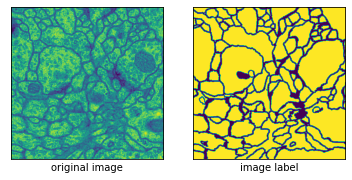

In [3]:
# read images and labels
# transfer png to nifti file; if not need to save, keep save_nii=False
from DataFunctions import * # function generate nifti file from images, writen by us
import matplotlib.pylab as plt
# save original training set
image_original = img2nii('./data/membrane/train/image/',save_nii=True,
                 image_prefix='.',save_name = 'training_original',
                save_path='./data/')
label_original = img2nii('./data/membrane/train/label/',save_nii=True,
                 image_prefix='.',save_name = 'label_original',
                save_path='./data/')
# show original image and segmentation
print('Original image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_original[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('original image')
plt.subplot(122)
plt.imshow(label_original[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Data augmentation

In [6]:
# Data augmentation
# Generate images
data_gen_args = dict(rotation_range=70,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')
Image_generated = ImageGenerator(batch_size=10,train_path='data/membrane/train',
               image_folder='image',mask_folder='label',aug_dict=data_gen_args,
               image_color_mode = "grayscale",mask_color_mode = "grayscale",
               image_save_prefix  = "image",mask_save_prefix  = "mask",
                     flag_multi_class = False,num_class = 2,
               save_to_dir = "data/membrane/train/aug",target_size=(388,388),seed = 1)
num_batch = 30
for i,batch in enumerate(Image_generated):
    if(i >= num_batch):
        break

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


augmentated image and segmentation


Text(0.5, 0, 'image label')

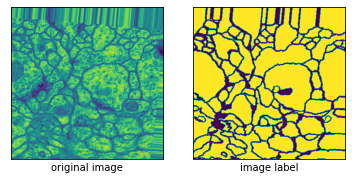

In [7]:
# save generated images
image_aug = img2nii('./data/membrane/train/aug/',save_nii=True,
                 image_prefix='image',save_name = 'training_aug',
                save_path='./data/')
label_aug = img2nii('./data/membrane/train/aug/',save_nii=True,
                 image_prefix='mask',save_name = 'label_aug',
                save_path='./data/')
# show augmentated image and segmentation
print('augmentated image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_aug[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('original image')
plt.subplot(122)
plt.imshow(label_aug[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Data nomalization

Normalized image and segmentation


Text(0.5, 0, 'image label')

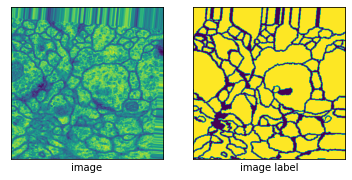

In [8]:
# normalized images
image_norm = imgNormlize(folder='./data/membrane/train/aug/',
                     image_prefix='image',mask=False,
                     save_name= 'test',save_nii=True,
            save_path='./data/')
# normalized mask
label_norm = imgNormlize(folder='./data/membrane/train/aug/',
                     image_prefix='mask',mask=True,
                     save_name= 'test',save_nii=True,
            save_path='./data/')
# show normalized image and segmentation
print('Normalized image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_norm[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image')
plt.subplot(122)
plt.imshow(label_norm[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Image padding

padded image and segmentation


Text(0.5, 0, 'image label')

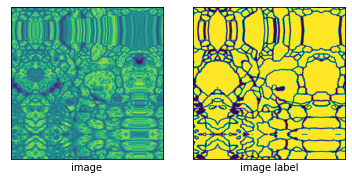

In [9]:
# Image padding
imgPadding(folder='./data/membrane/train/aug/',
            mode='symmetric',size=[572,572],
            save_path='./data/membrane/train/aug_mirror/')

image_padded = img2nii('./data/membrane/train/aug_mirror/',save_nii=True,
                 image_prefix='image',save_name = 'training_padded',
                save_path='./data/')
label_padded = img2nii('./data/membrane/train/aug_mirror/',save_nii=True,
                 image_prefix='mask',save_name = 'label_padded',
                save_path='./data/')
# show original image and segmentation
print('padded image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_padded[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image')
plt.subplot(122)
plt.imshow(label_padded[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Test data preprocessing

In [33]:
# save original test set
test_original = img2nii('./data/membrane/test/',save_nii=True,
                 image_prefix='.',save_name = 'test_original',
                save_path='./data/')
test_label_original = img2nii('./data/membrane/test_label/',save_nii=True,
                 image_prefix='.',save_name = 'test_label_original',
                save_path='./data/')

from scipy.ndimage import zoom
test_norm = zoom(test_original, (388/512, 388/512, 1),mode='nearest')/255
array_input = test_norm
array2nii(array_input,'test_norm','./data/')

test_label_norm = zoom(test_label_original, (388/512, 388/512, 1),mode='nearest')/255
test_label_norm[test_label_norm>0.5] = 1
test_label_norm[test_label_norm<=0.5] = 0
array_input = test_label_norm
array2nii(array_input,'test_label_norm','./data/')

## UNet model in the paper

### UNet model constructions
* See functions in DataFunctions.py

## UNet training and prediction

In [12]:
from UNet2D import *
model = UNet2d()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1,
                                   save_best_only=True)
imgs_train = image_norm.swapaxes(1,2).swapaxes(0,1)
imgs_mask = label_norm.swapaxes(1,2).swapaxes(0,1)
model.fit(imgs_train, imgs_mask, batch_size=10, epochs=2, verbose=1,validation_split=0.2,
          shuffle=True, callbacks=[model_checkpoint])

2022-04-24 23:51:34.194921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 23:51:34.195380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/erjun/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-24 23:51:34.195436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/erjun/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-24 23:51:34.195487: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror:

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 388, 388, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.compat.v1.pad (TFOpLambda)  (None, 572, 572, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 570, 570, 64  640         ['tf.compat.v1.pad[0][0]']       
                                )                                                                 
                                                                                               

                                8)                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 196, 196, 12  147584      ['conv2d_14[0][0]']              
                                8)                                                                
                                                                                                  
 center_crop (CenterCrop)       (None, 392, 392, 64  0           ['conv2d_1[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 392, 392, 64  32832      ['conv2d_15[0][0]']              
 spose)                         )                                                                 
          

## Prediction

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 388, 388, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.compat.v1.pad_5 (TFOpLambda  (None, 572, 572, 1)  0          ['input_6[0][0]']                
 )                                                                                                
                                                                                                  
 conv2d_95 (Conv2D)             (None, 570, 570, 64  640         ['tf.compat.v1.pad_5[0][0]']     
                                )                                                              

                                6)                                'conv2d_transpose_22[0][0]']    
                                                                                                  
 conv2d_109 (Conv2D)            (None, 198, 198, 12  295040      ['concatenate_22[0][0]']         
                                8)                                                                
                                                                                                  
 conv2d_110 (Conv2D)            (None, 196, 196, 12  147584      ['conv2d_109[0][0]']             
                                8)                                                                
                                                                                                  
 center_crop_25 (CenterCrop)    (None, 392, 392, 64  0           ['conv2d_96[0][0]']              
                                )                                                                 
          

/tmp/ipykernel_563456/3190144981.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(test_input,30,verbose=1)
2022-04-25 00:43:19.745970: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: UNet/center_crop_25/cond/branch_executed/_39


30/30 [==============================] - 17s 538ms/step


Text(0.5, 0, 'image label')

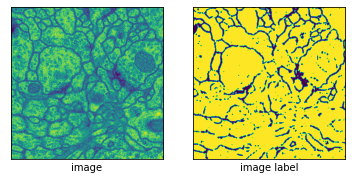

In [34]:
# prediction
model = UNet2d()
model.load_weights("unet_membrane.hdf5")
test_input = test_norm.swapaxes(1,2).swapaxes(0,1)
results = model.predict_generator(test_input,30,verbose=1)
# save results
prediction = np.squeeze(results).swapaxes(0,1).swapaxes(1,2)
prediction[prediction>0.5] = 1
prediction[prediction<=0.5] = 0
array2nii(prediction,'test_prediction','./data/')
# show prediction
plt.figure()
plt.subplot(121)
plt.imshow(test_norm[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image')
plt.subplot(122)
plt.imshow(prediction[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

In [35]:
import keras.backend as K
from sklearn.metrics import accuracy_score
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [69]:
Dice_score = dice_coef(test_label_norm.astype(np.float32),prediction)
accuracy = accuracy_score(test_label_norm.astype(np.float32).flatten(),prediction.flatten())

print('Dice_score: ',Dice_score.numpy())
print('Accuracy: ',accuracy)

Dice_score:  0.9042642
Accuracy:  0.8478256633719489
